In [1]:
%%javascript 
$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [33]:
%matplotlib inline

from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from calculate_from_DOS import *

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.style.use('seaborn-notebook')


ValueError: max() arg is an empty sequence

In this notebook, we'll take a look at the Gaussian and Lorentzian broadened versions of the density of states, and perform standard Dingle plot analysis on them. We're concerned only with the low-temperature limit of the resistivity, which is proportional to the density of states at the fermi energy.

In [3]:
n_e = 3e15
E_f = E_fermi(n_e)
eps = generate_eps(0.1, 0.1, n_e)
E_f_index = np.where(eps>=E_f)[0][0]
tau_q = 1e-12

In [11]:
B_arr = np.linspace (0.1, 0.5, 2000)
D_g = np.array([generate_DOS(B, tau_q, eps, broadening='Gaussian')[1][E_f_index] for B in B_arr])
D_l = np.array([generate_DOS(B, tau_q, eps, broadening='Lorentzian')[1][E_f_index] for B in B_arr])

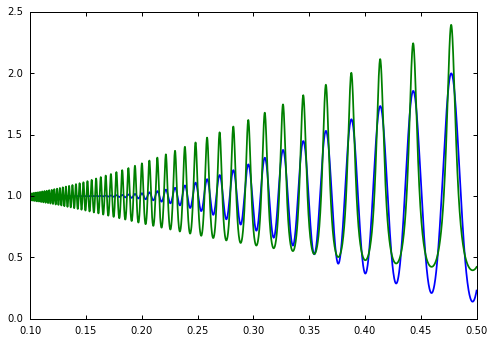

In [12]:
plt.plot(B_arr, D_g)
plt.plot(B_arr, D_l)

Gaussian: A=$.2f
Lorentzian: A=$.2f


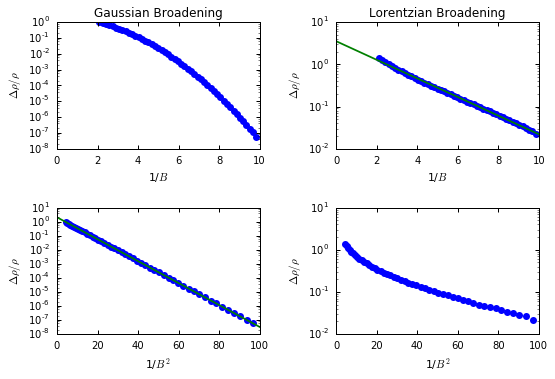

In [40]:
def get_local_extrema(y):
    peaks = np.where((y[1:-1] > y[0:-2]) * (y[1:-1] > y[2:]))[0] + 1
    dips = np.where((y[1:-1] < y[0:-2]) * (y[1:-1] < y[2:]))[0] + 1
    
    return peaks, dips #x[peaks], y[peaks], x[dips], y[dips]

peaks_g, dips_g = get_local_extrema(D_g)
peaks_l, dips_l = get_local_extrema(D_l)

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
plt.semilogy (1/B_arr[peaks_g], D_g[peaks_g]-1, 'o')
ax1.set_xlabel ('1/$B$')
ax1.set_title("Gaussian Broadening")

ax2 = fig.add_subplot(2,2,3)
plt.semilogy (1/B_arr[peaks_g]**2, D_g[peaks_g]-1, 'o')
ax2.set_xlabel ('1/$B^2$')

ax3 = fig.add_subplot(2,2,2)
plt.semilogy (1/B_arr[peaks_l], D_l[peaks_l]-1, 'o')
ax3.set_xlabel ('1/$B$')
ax3.set_title("Lorentzian Broadening")

ax4 = fig.add_subplot(2,2,4)
plt.semilogy (1/B_arr[peaks_l]**2, D_l[peaks_l]-1, 'o')
ax4.set_xlabel ('1/$B^2$')

for ax in [ax1,ax2, ax3, ax4]:
    ax.set_xlim (xmin = 0)
    ax.set_ylabel(r'$\Delta \rho / \rho$')

B2 = np.arange (0.1, 1000)
linear = lambda x, m, b: m*x + b   
params = curve_fit(linear, 1/B_arr[peaks_g]**2, np.log(D_g[peaks_g]-1))
m,b = params[0]
A = exp(b)
ax2.semilogy (1/B2**2, A * exp (m/B2**2))
print("Gaussian: A=$.2f"%A)


linear = lambda x, m, b: m*x + b   
params = curve_fit(linear, 1/B_arr[peaks_l], np.log(D_l[peaks_l]-1))
m,b = params[0]
A = exp(b)
ax3.semilogy (1/B2, A * exp (m/B2))
print("Lorentzian: A=$.2f"%A)
plt.tight_layout()

The values of the intercepts on the linear fit are supposed to be 2 for Gaussian broadened DOS and 4 for Lorentzian-broadened.